## Entrega Taller 1 "Planetas".

### Integrantes:
#### Carlos García
#### Bryan Meza

## Explicación detallada del código:

1. **Exploración Inicial**
   - **Cargar el conjunto de datos:** Utilizamos `sns.load_dataset('planetas')` para cargar los datos.
   - **Mostrar las primeras filas:** Usamos `planetas.head()` para ver una muestra inicial de los datos.

2. **Tipos de Datos**
   - **Identificar los tipos de datos:** Con `planetas.info()` obtenemos información sobre el tipo y cantidad de datos en cada columna.
   - **Discutir los tipos de datos:** Imprimimos los tipos de datos de cada columna usando `planetas.dtypes`.

3. **Preguntas**
   - **Método más comúnmente utilizado para detectar exoplanetas:**
     - Contamos las ocurrencias de cada método con `value_counts()` y obtenemos el más común con `idxmax()`.
   - **Período orbital más largo registrado:**
     - Utilizamos `planetas['orbital_period'].max()` para encontrar el valor máximo.
   - **Número de exoplanetas descubiertos en un año específico:**
     - Filtramos el DataFrame por el año deseado y contamos el número de registros.
   - **Correlación entre la masa y la distancia a la Tierra:**
     - Eliminamos las filas con valores faltantes en 'mass' y 'distance' usando `dropna()`.
     - Calculamos la correlación con `.corr()`.
   - **Sistema estelar con más exoplanetas:**
     - Encontramos el número máximo de planetas en un sistema con `planetas['number'].max()`.
     - Filtramos los sistemas que tienen ese número y mostramos los métodos utilizados.

4. **Tratamiento de Datos Faltantes**
   - **Identificar variables con datos faltantes:** Usamos `isnull().sum()` y filtramos las columnas que tienen valores faltantes.
   - **Discutir estrategias para manejar los datos faltantes:**
     - Mencionamos varias técnicas como eliminación, imputación y modelos predictivos.
   - **Imputación de valores faltantes:** Como ejemplo, imputamos los valores faltantes de 'mass' con la mediana.

5. **Visualización de Datos**
   - **Gráfico de barras del número de exoplanetas detectados por método:**
     - Usamos `plot(kind='bar')` para visualizar la cantidad de detecciones por método.
   - **Histograma de la distribución del período orbital:**
     - Utilizamos `hist()` para mostrar la distribución de los períodos orbitales.
   - **Gráfico de dispersión de masa vs distancia:**
     - Creamos un scatter plot con `plt.scatter()` para visualizar la relación entre masa y distancia.
   - **Gráfico de dispersión de masa vs período orbital:**
     - Otro scatter plot para visualizar la relación entre masa y período orbital, usando una escala logarítmica en el eje x.

**Nota:** Este código debe ejecutarse en un entorno que soporte la visualización de gráficos, como Jupyter Notebook. Asegúrate de tener instaladas las librerías necesarias (`seaborn`, `pandas`, `matplotlib`) antes de ejecutar el código.

## Revisión Detallada por Ítems

1. **Método más comúnmente utilizado para detectar exoplanetas**
   - Para determinar el método más utilizado, contamos las ocurrencias de cada método en la columna `method` utilizando `value_counts()`. Posteriormente, extraemos el método con mayor frecuencia con `idxmax()`.

2. **Período orbital más largo registrado**
   - Para encontrar el período orbital más largo registrado, utilizamos la función `max()` sobre la columna `orbital_period`, lo que nos devuelve el valor máximo.

3. **Número de exoplanetas descubiertos en un año específico**
   - Para contar los exoplanetas descubiertos en un año específico, filtramos el DataFrame por el valor del año en la columna `year` y luego contamos los registros resultantes con `.shape[0]`.

4. **Correlación entre la masa y la distancia a la Tierra**
   - Primero, eliminamos las filas con valores faltantes en las columnas `mass` y `distance` utilizando `dropna()`. Después, calculamos la correlación entre ambas variables con el método `.corr()`.

5. **Sistema estelar con más exoplanetas**
   - Encontramos el número máximo de exoplanetas en un sistema usando `max()` en la columna `number`. Luego, filtramos los sistemas que coinciden con este valor y mostramos los métodos de detección utilizados.


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.Exploración Inicial

In [3]:
df=sns.load_dataset('planets')
df.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## 2.Tipos de datos

In [4]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [14]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            1035 non-null   float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


##### El conjunto de datos incluye seis variables: method, categórica nominal que describe el método de detección de exoplanetas; number, numérica discreta que indica el número de exoplanetas en el sistema (mínimo 1, máximo 7); orbital_period, numérica continua que muestra el período orbital en días (máximo 730,000) con 43 valores faltantes; mass, numérica continua que expresa la masa en unidades de Júpiter (máximo 25) y tiene 522 valores faltantes; distance, numérica continua que representa la distancia a la Tierra en años luz (máximo 8,500) con 227 valores faltantes; y year, numérica discreta que indica el año de descubrimiento (1989-2014).

## 3.Preguntas

In [5]:
#- ¿Cuál es el método más comúnmente utilizado para detectar exoplanetas?
common_method = df['method'].value_counts().idxmax()
common_method_count = df['method'].value_counts().max()

print(f'El metodo más común es {common_method} con un total de {common_method_count} planetas detectados')

El metodo más común es Radial Velocity con un total de 553 planetas detectados


In [6]:
#- ¿Cuál es el período orbital más largo registrado?
longest_orbital_period = df['orbital_period'].max()
print(f'El periodo orbital mas largo resgitrado es de {longest_orbital_period}')

El periodo orbital mas largo resgitrado es de 730000.0


In [7]:
#- ¿Cuántos exoplanetas fueron descubiertos en un año específico?
year_specific = 2012
exoplanets_in_year = df[df['year'] == year_specific].shape[0]
print(f'el año {year_specific} se descubrieron {exoplanets_in_year}')

el año 2012 se descubrieron 140


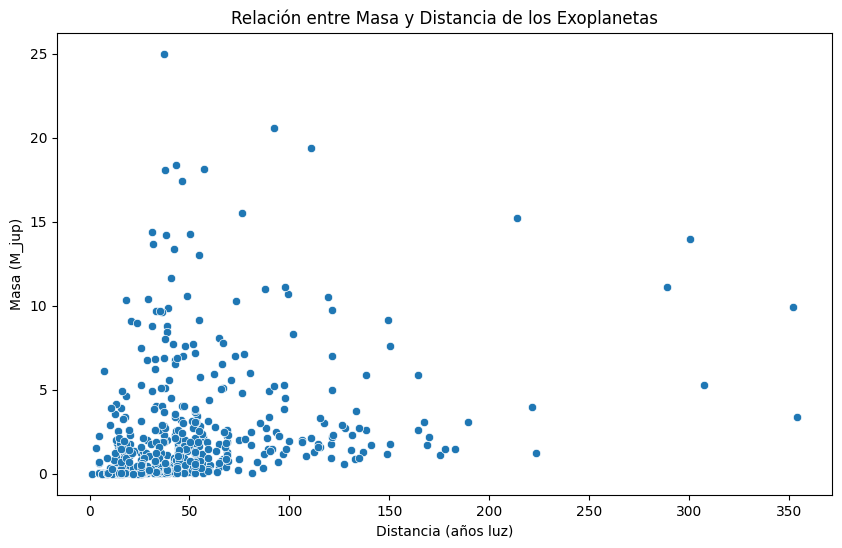

In [8]:
#¿Existe una correlación entre la masa de un exoplaneta y su distancia a la Tierra?

correlation_mass_distance = df[['mass', 'distance']].corr()

# Mostrar la correlación
correlation_mass_distance

# Graficar la relación entre masa y distancia con un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='mass')
plt.title('Relación entre Masa y Distancia de los Exoplanetas')
plt.xlabel('Distancia (años luz)')
plt.ylabel('Masa (M_jup)')
plt.show()

In [9]:
print(f'la correlacion es {correlation_mass_distance}')

la correlacion es               mass  distance
mass      1.000000  0.274082
distance  0.274082  1.000000


##### Se puede ver que la correlación entre estas dos variables es de 0.274082, lo cual hace que sea un numero más bien cercano a 0 por lo que se podria decir que no hay correlación entre ambas variables, lo cual se demuestra despues al observar el grafico de dispersión y no ver una tendencia clara de los datos

In [10]:
#¿Cuál es el sistema estelar con más exoplanetas?
system_with_most_planets = df['number'].value_counts().idxmax()
system_with_most_planets_count = df['number'].value_counts().max()
system_with_most_planets, system_with_most_planets_count
print(f'el sistema con mas exoplanetas es el {system_with_most_planets}, con {system_with_most_planets_count}')

el sistema con mas exoplanetas es el 1, con 595


## 4.Valores Faltantes

In [12]:
missing_data = df.isnull().sum()
missing_data

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

### se puede ver que la variable *orbital_period* tiene 43 valores faltantes, lo cual es el 4% de los datos, la variable *mass* tiene 522 valores, lo cual es un 50% de datos faltantes y *distance* tiene 227, lo cual es un 21% del los datos

In [17]:
#Imputación de valores de mass con la mediana
mediana_masa = df['mass'].median()
df['mass'].fillna(mediana_masa, inplace=True)
df

C:\Users\cgarciaa\AppData\Local\Temp\ipykernel_16884\3600793844.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mass'].fillna(mediana_masa, inplace=True)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,1.26,172.00,2006
1031,Transit,1,2.615864,1.26,148.00,2007
1032,Transit,1,3.191524,1.26,174.00,2007
1033,Transit,1,4.125083,1.26,293.00,2008



#### por temas de tiempo no alcanzamos a reparar más valores, pero explorariamos la posibilidad de utilizar KNN para buscar los valores perdidos de la variable **distance**, además la imputación a mass puede entrar a discusión porque la cantidad de valores que habría que imputar es de un 50% y al hacer esto se podría modificar los datos de una manera que afecte mucho el resultado final.

## 5. Graficas

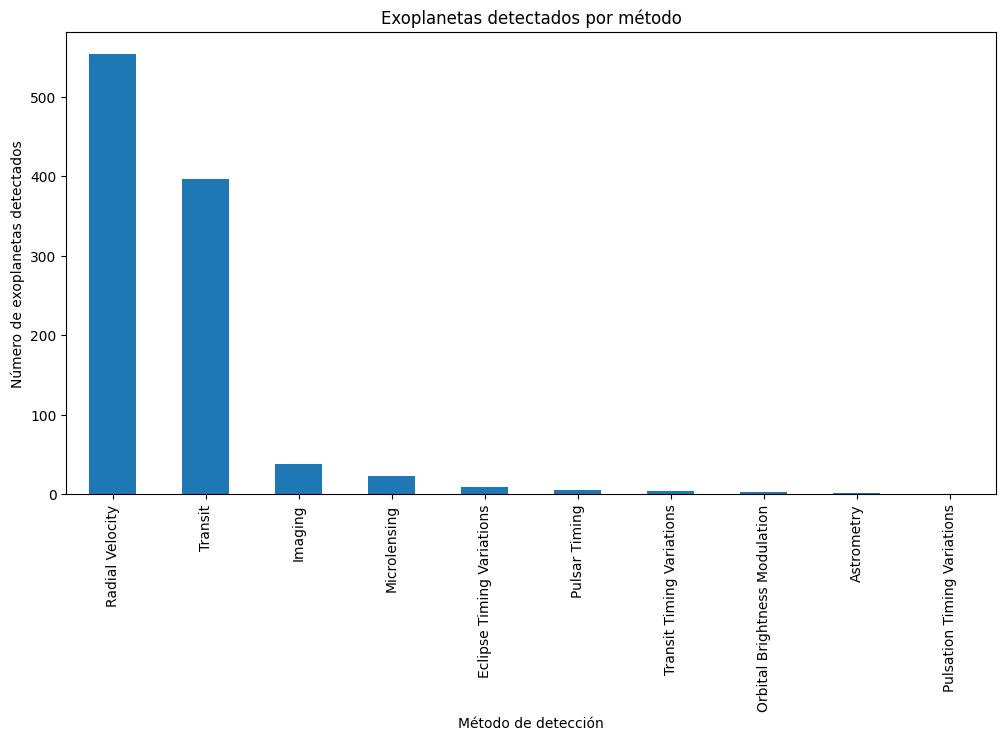

In [22]:
# Gráfico de barras del número de exoplanetas detectados por método
contar_metodos = df['method'].value_counts()
plt.figure(figsize=(12,6))
contar_metodos.plot(kind='bar')
plt.xlabel('Método de detección')
plt.ylabel('Número de exoplanetas detectados')
plt.title('Exoplanetas detectados por método')
plt.show()

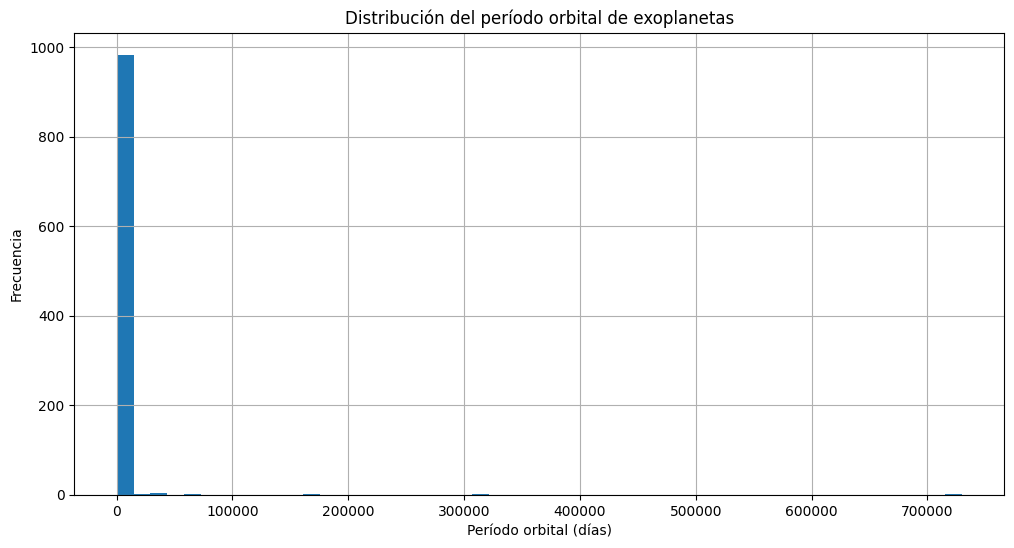

In [23]:
# Histograma de la distribución del período orbital
plt.figure(figsize=(12,6))
df['orbital_period'].dropna().hist(bins=50)
plt.xlabel('Período orbital (días)')
plt.ylabel('Frecuencia')
plt.title('Distribución del período orbital de exoplanetas')
plt.show()


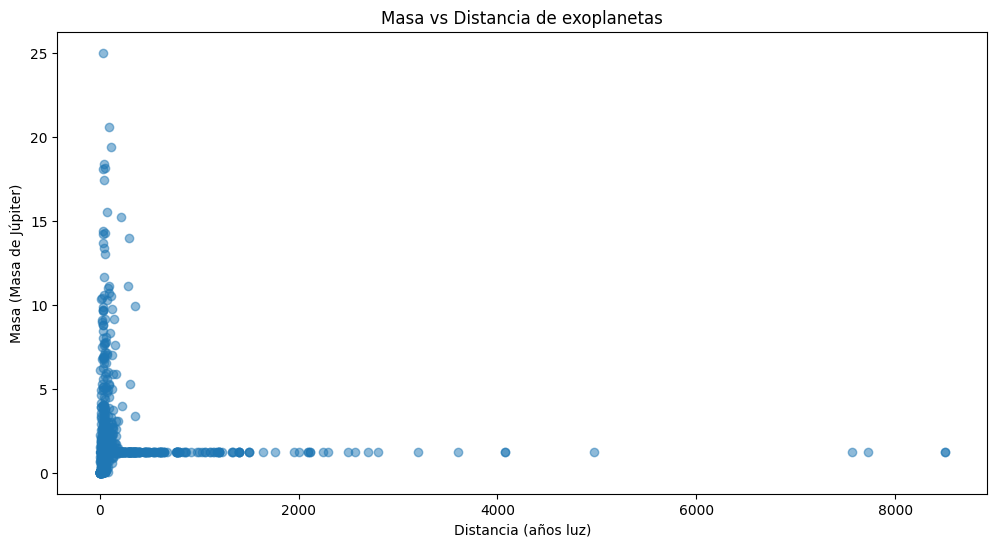

In [25]:
# Gráfico de dispersión de masa vs distancia
masa_distancia = df[['mass', 'distance']].dropna()
plt.figure(figsize=(12,6))
plt.scatter(df['distance'], df['mass'], alpha=0.5)
plt.xlabel('Distancia (años luz)')
plt.ylabel('Masa (Masa de Júpiter)')
plt.title('Masa vs Distancia de exoplanetas')
plt.show()

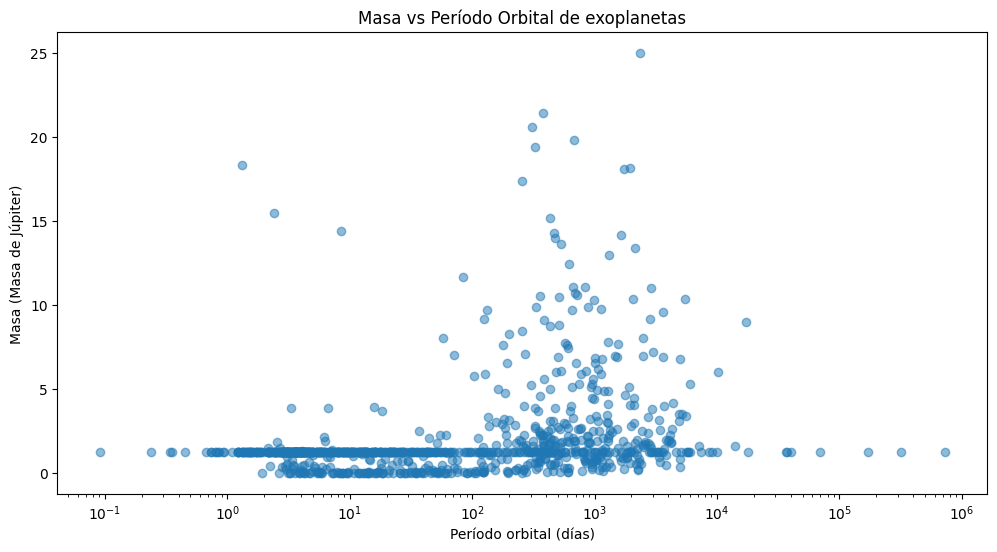

In [26]:
# Gráfico de dispersión de masa vs período orbital
mass_orbital_period = df[['mass', 'orbital_period']].dropna()
plt.figure(figsize=(12,6))
plt.scatter(mass_orbital_period['orbital_period'], mass_orbital_period['mass'], alpha=0.5)
plt.xlabel('Período orbital (días)')
plt.ylabel('Masa (Masa de Júpiter)')
plt.title('Masa vs Período Orbital de exoplanetas')
plt.xscale('log')
plt.show()